<a href="https://colab.research.google.com/github/Luis-Rosario/license_plate_detection_cnn/blob/main/cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Load chinese license plate tfrecords 

Use tensorflow 2

In [ ]:
%tensorflow_version 2.x


In [ ]:
import os
import tensorflow as tf
#import IPython.display as display

print(tf.__version__)


2.8.0


## Import data from Drive

In [ ]:
from google.colab import drive
drive.mount('/content/google-drive')

Mounted at /content/google-drive


## Copying tfrecords from drive to colab

In [ ]:
!mkdir trainData
#!cp /content/google-drive/'My Drive'/data/images_gray_0.tfrecords ./trainData/
!cp /content/google-drive/'My Drive'/gray2Recs/images_gray_0.tfrecords ./trainData/
!ls trainData

mkdir: cannot create directory ‘trainData’: File exists
cp: cannot stat '/content/google-drive/My Drive/gray2Recs/images_gray_0.tfrecords': Transport endpoint is not connected
images_gray_1.tfrecords


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Create tfrecords dataset

In [ ]:
tfrecordsDir = 'trainData/'
trainNumbers = [1]
trainfiles = [tfrecordsDir + 'images_gray_'+str(i) + '.tfrecords' for i in trainNumbers]
train_raw_image_dataset = tf.data.TFRecordDataset(trainfiles)

In [ ]:
#How many examples are in the tfrecord

In [ ]:
count =0
for i in train_raw_image_dataset:
  count +=1
print(count)

3333


## Decode tfrecords

In [ ]:
# Create a dictionary describing the features.
image_feature_description = {
            'chinaprov': tf.io.FixedLenFeature([], tf.int64),
            'letter': tf.io.FixedLenFeature([], tf.int64),
            'seq0':  tf.io.FixedLenFeature([], tf.int64),
            'seq1': tf.io.FixedLenFeature([], tf.int64),
            'seq2':  tf.io.FixedLenFeature([], tf.int64),
            'seq3': tf.io.FixedLenFeature([], tf.int64),
            'seq4':  tf.io.FixedLenFeature([], tf.int64),
            'image_raw': tf.io.FixedLenFeature([], tf.string),
        }


In [ ]:
def _parse_image_function(example_proto):
  # Parse the input tf.Example proto using the dictionary above.
  return tf.io.parse_single_example(example_proto, image_feature_description)


In [ ]:
train_parsed_image_dataset = train_raw_image_dataset.map(_parse_image_function)

### **look** at one example

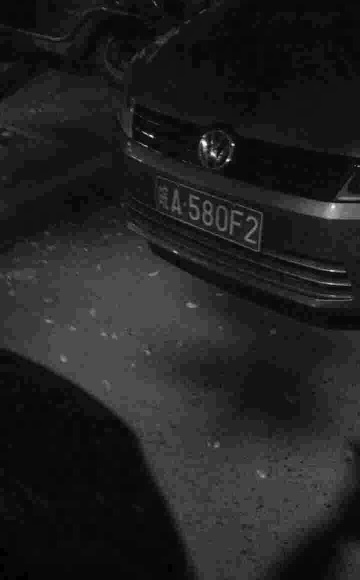

(580, 360, 1)
uint8


In [ ]:
import IPython.display as display
it = iter(train_parsed_image_dataset)
data_parsed =next(it)
image = data_parsed['image_raw'].numpy()
display.display(display.Image(data=image))
img = tf.image.decode_png(data_parsed['image_raw'])
print(img.numpy().shape)
print(img.numpy().dtype)

 ## Create inputs and labels from raw images

In [ ]:
num_chinaprov = 38
num_letter = 38
num_seq = 38



def buildLabels(parsed_data):
  chinaprov = parsed_data['chinaprov']
  chinaprov_enc = tf.keras.backend.one_hot(chinaprov,num_chinaprov)
  letter = parsed_data['letter']
  letter_enc = tf.keras.backend.one_hot(letter, num_letter)
  seq0 = parsed_data['seq0']
  seq0_enc = tf.keras.backend.one_hot(seq0, num_seq)
  seq1 = parsed_data['seq1']
  seq1_enc = tf.keras.backend.one_hot(seq1, num_seq)
  seq2 = parsed_data['seq2']
  seq2_enc = tf.keras.backend.one_hot(seq2, num_seq)
  seq3 = parsed_data['seq3']
  seq3_enc = tf.keras.backend.one_hot(seq3, num_seq)
  seq4  = parsed_data['seq4']
  seq4_enc = tf.keras.backend.one_hot(seq4, num_seq)
  label = tf.stack([chinaprov_enc, letter_enc, seq0_enc, seq1_enc, seq2_enc, seq3_enc, seq4_enc])
  return label

def buildallLabels(parsed_data):
  chinaprov = parsed_data['chinaprov']
  chinaprov_enc = tf.keras.backend.one_hot(chinaprov,num_chinaprov)
  letter = parsed_data['letter']
  letter_enc = tf.keras.backend.one_hot(letter, num_letter)
  seq0 = parsed_data['seq0']
  seq0_enc = tf.keras.backend.one_hot(seq0, num_seq)
  seq1 = parsed_data['seq1']
  seq1_enc = tf.keras.backend.one_hot(seq1, num_seq)
  seq2 = parsed_data['seq2']
  seq2_enc = tf.keras.backend.one_hot(seq2, num_seq)
  seq3 = parsed_data['seq3']
  seq3_enc = tf.keras.backend.one_hot(seq3, num_seq)
  seq4  = parsed_data['seq4']
  seq4_enc = tf.keras.backend.one_hot(seq4, num_seq)
  label2 = tf.stack([chinaprov_enc, letter_enc, seq0_enc, seq1_enc, seq2_enc, seq3_enc, seq4_enc])
  #return (label1, chinaprov_enc) #tf.dtypes.cast(, dtype = tf.float32))
  return label2

def buildInputsLabels(parsed_data):
  img = tf.image.decode_png(parsed_data['image_raw'])
  img = tf.dtypes.cast(img, dtype = tf.float32)
  labels = buildLabels(parsed_data)   
  return   img,  labels

In [ ]:
trainDataset = train_parsed_image_dataset.map(buildInputsLabels).shuffle(2000)

### get one example, inputs, label from the dataset

In [ ]:
newIt = iter(trainDataset)
data =next(newIt)
data[1].shape


TensorShape([7, 38])